<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/EMAIL_SPAM_%2C_HAM_USING_LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('/content/sample_data/spambase.data')

In [3]:
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [6]:
df2 = pd.read_csv('/content/sample_data/spambase.names', sep='\t')

In [7]:
with open('/content/sample_data/spambase.names', 'r') as f:
    lines = [line.replace('\n', '') for line in f.readlines()]

with open('/content/sample_data/spambase.names', 'w') as f:
    f.writelines(lines)

In [8]:
df2 = pd.read_table('/content/sample_data/spambase.names')

In [10]:
df2

,"| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)|| 48 continuous real [0,100] attributes of type word_freq_WORD | = percentage of words in the e-mail that match WORD,| i.e. 100 * (number of times the WORD appears in the e-mail) / | total number of words in e-mail. A ""word"" in this case is any | string of alphanumeric characters bounded by non-alphanumeric | characters or end-of-string.|| 6 continuous real [0,100] attributes of type char_freq_CHAR| = percentage of characters in the e-mail that match CHAR,| i.e. 100 * (number of CHAR occurences) / total characters in e-mail|| 1 continuous real [1,...] attribute of type capital_run_length_average| = average length of uninterrupted sequences of capital letters|| 1 continuous integer [1,...] attribute of type capital_run_length_longest| = length of longest uninterrupted sequence of capital letters|| 1 continuous integer [1,...] attribute of type capital_run_length_total| = sum of length of uninterrupted sequences of capital letters| = total number of capital letters in the e-mail|| 1 nominal {0,1} class attribute of type spam| = denotes whether the e-mail was considered spam (1) or not (0), | i.e. unsolicited commercial e-mail. || For more information, see file 'spambase.DOCUMENTATION' at the| UCI Machine Learning Repository: http://www.ics.uci.edu/~mlearn/MLRepository.html1, 0. | spam, non-spam classesword_freq_make: continuous.word_freq_address: continuous.word_freq_all: continuous.word_freq_3d: continuous.word_freq_our: continuous.word_freq_over: continuous.word_freq_remove: continuous.word_freq_internet: continuous.word_freq_order: continuous.word_freq_mail: continuous.word_freq_receive: continuous.word_freq_will: continuous.word_freq_people: continuous.word_freq_report: continuous.word_freq_addresses: continuous.word_freq_free: continuous.word_freq_business: continuous.word_freq_email: continuous.word_freq_you: continuous.word_freq_credit: continuous.word_freq_your: continuous.word_freq_font: continuous.word_freq_000: continuous.word_freq_money: continuous.word_freq_hp: continuous.word_freq_hpl: continuous.word_freq_george: continuous.word_freq_650: continuous.word_freq_lab: continuous.word_freq_labs: continuous.word_freq_telnet: continuous.word_freq_857: continuous.word_freq_data: continuous.word_freq_415: continuous.word_freq_85: continuous.word_freq_technology: continuous.word_freq_1999: continuous.word_freq_parts: continuous.word_freq_pm: continuous.word_freq_direct: continuous.word_freq_cs: continuous.word_freq_meeting: continuous.word_freq_original: continuous.word_freq_project: continuous.word_freq_re: continuous.word_freq_edu: continuous.word_freq_table: continuous.word_freq_conference: continuous.char_freq_;: continuous.char_freq_(: continuous.char_freq_[: continuous.char_freq_!: continuous.char_freq_$: continuous.char_freq_#: continuous.capital_run_length_average: continuous.capital_run_length_longest: continuous.capital_run_length_total: continuous."


In [11]:
df.isnull().sum()

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.43      0
0.778     0
0.44      0
0.45      0
3.756     0
61        0
278       0
1         0
dtype: int64

In [13]:
# Check if the column '48' exists in the DataFrame
if '48' in df.columns:
    # Drop the column '48'
    X = df.drop('48', axis=1)
    Y = df['48']
else:
    print("Column '48' not found in the DataFrame.")

Column '48' not found in the DataFrame.


In [14]:
pip install ucimlrepo

In [15]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

# metadata
print(spambase.metadata)

# variable information
print(spambase.variables)


{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [17]:
# prompt: prepare the abve data for classification using logistic regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [18]:
# prompt: apply logistic regression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.91


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# prompt: print the classification matrix

from sklearn.metrics import confusion_matrix

# Get the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(confusion_matrix)


[[646  45]
 [ 53 407]]


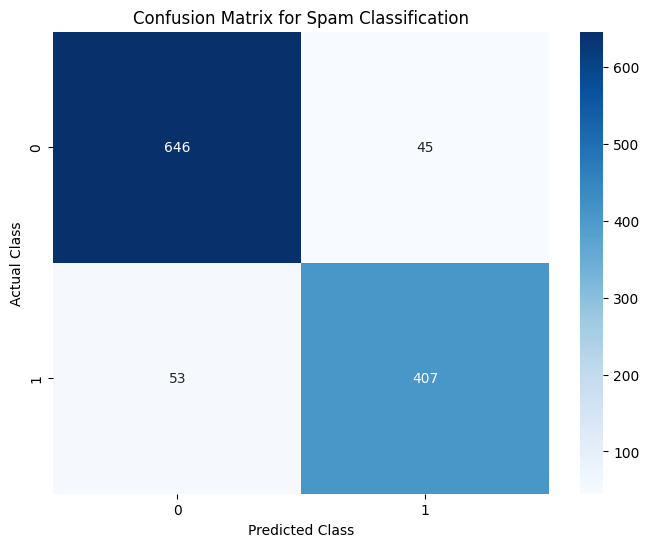

In [21]:
# prompt: make a plot for confuison matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")

# Add labels and title
plt.title("Confusion Matrix for Spam Classification")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

# Display the plot
plt.show()
